# Group A

Groupmembers are:


|Gender|Firstname|Surname|Email| Study program| Semester| Student ID|
|:----:|:--------|:------|:----|:----------|:------------|:--------|
| f |Marie Felicitas| Forster | marie.forster@student.uni-siegen.de| HCI| 4| |
| m |Enzo| Frenker-Hackfort |enzo.frenker@student.uni-siegen.de| HCI|4||
| f | Jule |Jensen |jule.jensen@student.uni-siegen.de| HCI |3| 1624584|

    
**Course**: First steps into Artificial Intelligence: Organization & Introduction

**Examiner**: Prof. Dr. Thomas Ludwig

**Semester**: Summersemester 2022

**Submission date**: 31. July 2022

**City**: Siegen, Germany

## Imports
Following imports and addtional installtions are needed:

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Data Analysis

### Data Understanding

Load the dataset.

In [28]:
#diamonds = pd.read_csv("diamonds_FSAI_SoSe22.csv", index_col="Unnamed: 0")
datapath = "data/diamonds_FSAI_SoSe22.csv"
diamonds = pd.read_csv(datapath, index_col = 0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [29]:
# show an overview of the key descriptive stats
diamonds.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


#### Overview of Variables

**carat**: Carat weight of the diamond  
**cut**: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very
Good, Premium, Ideal  
**color**: Color of the diamond, with D being the best and J the worst  
**clarity**: How obvious inclusions are within the diamond: (I1 (worst), SI2, SI1, VS2, VS1, VVS2,
VVS1, IF (best))  
**depth**: depth %. The height of a diamond, measured from the culet to the table, divided by
its average girdle diameter  
**table**: table%. The width of the diamond's table expressed as a percentage of its average
diameter  
**price**: the price of the diamond in US dollars  
**x**: length mm  
**y**: width mm  
**z**: depth mm  

In [30]:
# identify number of rows with missing values
len(diamonds)-len(diamonds.dropna())

0

No missing values in datasheet.

In [31]:
# second test for mising values
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [32]:
# show sum of rows and columns
diamonds.shape

(45849, 10)

In [33]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Removing Outliers

In [34]:
# detext values for the last three variables which are equal 0
# if x, y, or z are 0 it is not a true value, because those variables
# tell us something about widht, length and depth of a diamond
# which can not be 0
diamonds.query("x==0 or y==0 or z==0").index

Int64Index([  782,  1339,  3496, 10574, 11329, 12084, 12633, 14338, 17835,
            22503, 25915, 26749, 30729, 36841, 37710, 41284, 44855],
           dtype='int64')

In [35]:
# we exlude the variables, we have just detected from the dataset
# and see that the shape has changed
diamonds.drop(diamonds.query("x==0 or y==0 or z==0").index, inplace=True)
diamonds.shape

(45832, 10)

We check once more the variabes x, y and z, this time for outliers.  
In the plots we see values far from the main part of the other values.

#### Visualization

Text(0.5, 1.0, 'Diamonds Variable X')

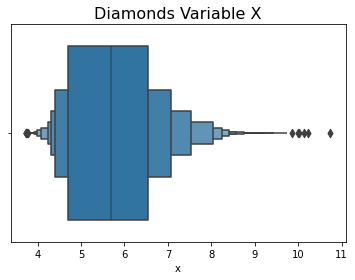

In [38]:
sns.boxenplot(x=diamonds["x"])
plt.title("Diamonds Variable X", fontsize =16)

Text(0.5, 1.0, 'Diamonds Variable y')

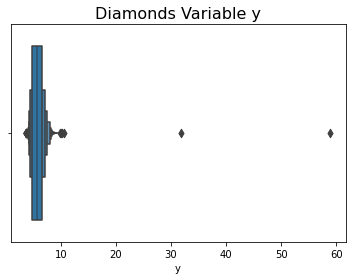

In [39]:
sns.boxenplot(x=diamonds["y"])
plt.title("Diamonds Variable y", fontsize =16)

Text(0.5, 1.0, 'Diamonds Variable z')

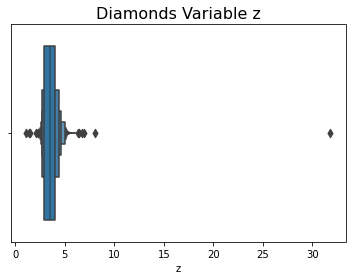

In [40]:
sns.boxenplot(x=diamonds["z"])
plt.title("Diamonds Variable z", fontsize =16)

Now we try to detect, how many outliers the dataset has and how to exclude them. With the code below we see a list of outliers, greater than a certain value for x, y or z.
Here we decided to

In [41]:
diamonds.query("x>9.8").index

Int64Index([3497, 7479, 13992, 20854, 38933, 41338], dtype='int64')

In [42]:
diamonds.query("y>10").index

Int64Index([12617, 13992, 20854, 23940, 41338], dtype='int64')

In [43]:
diamonds.query("z>6").index

Int64Index([1452, 3497, 4161, 7479, 12617, 13992, 20854, 31075, 37683, 38933,
            41338, 42250],
           dtype='int64')

In [44]:
diamonds.drop(diamonds.query("x>9.8").index, inplace=True)
diamonds.drop(diamonds.query("y>10").index, inplace=True)
diamonds.drop(diamonds.query("z>6").index, inplace=True)
diamonds.shape
# we have dropped 13 outliers

(45819, 10)

## Data Visualization

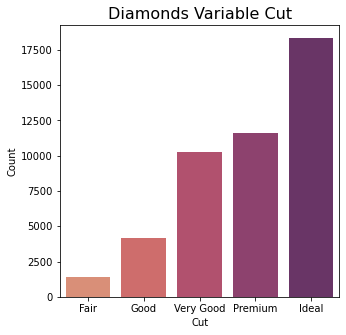

In [45]:
# Increasing quality order
# Fair (least best) < Good < Very Good < Premium < Ideal

plt.figure(figsize= (5,5))
sns.countplot(x= "cut", data= diamonds,
              palette=sns.color_palette("flare", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Diamonds Variable Cut", fontsize =16)
plt.show()

We see the dataset contains mostly diamonds with an ideal cut and barely with only a fair cut. Premium and very good cut have a rather similar count, and a good cut has the second lowest count in the data set.

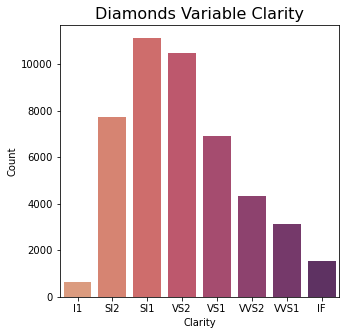

In [46]:
# Increasing quality order 
# I1 (Worst) < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF (best)
plt.figure(figsize= (5,5))
sns.countplot(x= "clarity", data= diamonds,
              order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2",
                     "VVS1", "IF"], palette= "flare")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.title("Diamonds Variable Clarity", fontsize =16)
plt.show()

For the clarity of the diamonds of the set we can see from the barchart above, that most of the diamonds are of quality SI2, SI1, VS2 and VS1, but the highest amount is of SI1, which is the third lowest quality in the range of clarity. The lowest (I1) and best (IF) clarity values are the rarest in the dataset.

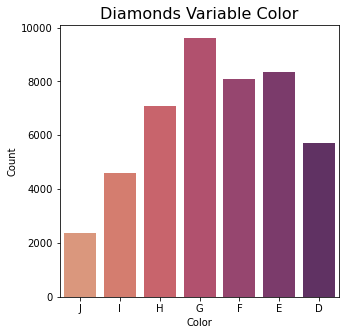

In [47]:
# Increasing quality order
# J (Worst) < I < H < G < F < E < D (best)
plt.figure(figsize= (5,5))
sns.countplot(x= "color", data= diamonds, palette= "flare", order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Diamonds Variable Color", fontsize =16)
plt.show()

For the quality the dataset shows the highest amount of diamonds with the color G, which is of mid-quality. The best color quality (D) is relatively often contained in the dataset and the lowest color quality (J) is the rarest within this dataset.

In [48]:
# set theme for the plot below
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Diamonds Price vs Carat')

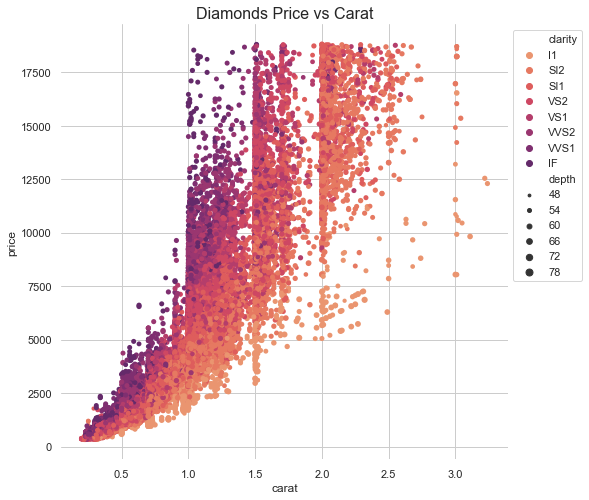

In [49]:
f, ax = plt.subplots(figsize=(8, 8))
# remove spines
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1",
                   "VVS2", "VVS1","IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="flare",
                hue_order=clarity_ranking,
                sizes=(1, 50), linewidth=0,
                data=diamonds, ax=ax, legend="brief")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Diamonds Price vs Carat", fontsize =16)

This scatterplot shows us every data point as a little sphere in the grid. We plot price against carat and use clarity as hue and depth as size. This means, the darker the points, the better the quality regarding clarity (IF darkest color) and the bigger the points, the greater their depth. Hence this, the plot shows us, that diamonds with a better clarity have in general a lower value for carat and a lower depth. The other way arount do diamonds with a lower quality regarding clarity have a higher value in carat and a greater depth.

Text(0.5, 1.0, 'Diamonds Table vs Depth')

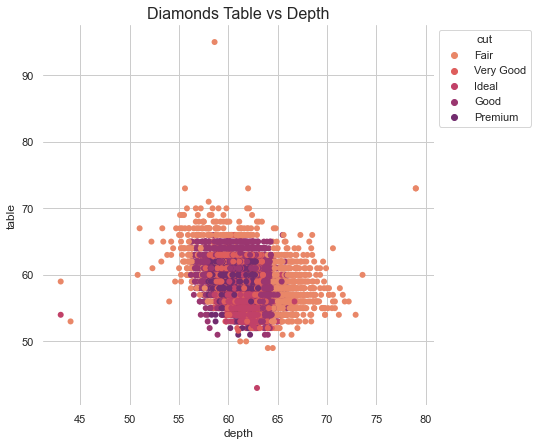

In [50]:
f, ax = plt.subplots(figsize=(7, 7))
# remove spines
sns.despine(f, left=True, bottom=True)
cut_ranking = ["Fair", "Very Good", "Ideal", "Good", "Premium"]
sns.scatterplot(x="depth", y="table",
                hue="cut", palette="flare",
                hue_order=cut_ranking,
                linewidth=0,
                data=diamonds, ax=ax, legend="brief")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Diamonds Table vs Depth", fontsize =16)

In the above scatterplot the variables table (width) and depth (height) are plottet against each other with the variable cut as hue. We can see here, that the orange dots for a fair cut (best quality) have a higher variance, because they are more all over the place and the darker purple dots for a premium cut are condensed in the middle of the grid. So, diamonds with a premium or good cut tend to have a more narrow depth range between 55 and 65, wherease diamonds with a fair or very good cut tend to vary in depth between 50 and 75. It is difficult to determind concrete statement about the relation between the variables table and depth. We can say, that diamonds with a fair cut tend to have a higher value for the variables table and depth, which means the are wider and higher as diamonds with a ideal or better cut quality. 

### Create Numerical  Variables

For the nexts steps some variables need to be transformed from strings to numbers, because the algorithms and mathematical operations can not be performed with strings. So the non-numerical variables will be rewritten as numerical variables where the numbers represent a string value. For example for the variable cut we have "Fair" as the best quality characteristic, which will be translatet into the number 1, standing from now on for the string "fair". With increasing whole numbers we so translate the cut quality into numbers. The higher the number, the less good the quality ("Ideal", the least good quality is translated into the number 5). Likewise we will proceed with the other two non-numerical variables. This way we achieve an ordinary level of measurement which includes aa rank between the values.

In [51]:
diamonds.loc[diamonds['cut'] == 'Fair', 'cut'] = 1
diamonds.loc[diamonds['cut'] == 'Good', 'cut'] = 2
diamonds.loc[diamonds['cut'] == 'Very Good', 'cut'] = 3
diamonds.loc[diamonds['cut'] == 'Premium', 'cut'] = 4
diamonds.loc[diamonds['cut'] == 'Ideal', 'cut'] = 5

* D is the best color value, it usually correlates with lower carat values & lower price
* J is the lowest color value (lowest quality) it correllates with a higher carat value & higher price

"Diamond color is measured using the Gemological Institute of America, or GIA color scale which goes from D (colorless) all the way to Z (light yellow or brown in color). Between D and Z (the normal color range), there are numerous diamond color grades, ranging from near colorless to slightly yellow. [...]
Diamond color matters, but only to a certain point. The way we approach the 4Cs, we **separate cut and carat weight from color and clarity.**  
Cut and carat are positive traits (you want to maximize as much as possible). Color and clarity are negative traits that you want to make sure you don’t notice when looking at a diamond."  
**Source:** https://www.diamonds.pro/education/color/

In [52]:
diamonds.loc[diamonds['color'] == 'J', 'color'] = 1
diamonds.loc[diamonds['color'] == 'I', 'color'] = 2
diamonds.loc[diamonds['color'] == 'H', 'color'] = 3
diamonds.loc[diamonds['color'] == 'G', 'color'] = 4
diamonds.loc[diamonds['color'] == 'F', 'color'] = 5
diamonds.loc[diamonds['color'] == 'E', 'color'] = 6
diamonds.loc[diamonds['color'] == 'D', 'color'] = 7

"Diamond clarity is a qualitative metric that grades the visual appearance of each diamond. The fewer inclusions and blemishes a diamond has, the better its clarity grade will be."  
Order from flawless to 0 % eye-clean:  
IF < VVS1 < VVS2 < VS1 < VS2 < SI1 < SI2 < I1 < I2/I3  
**Source:** https://www.diamonds.pro/education/clarity/

In [53]:
diamonds.loc[diamonds['clarity'] == 'I1', 'clarity'] = 1
diamonds.loc[diamonds['clarity'] == 'SI2', 'clarity'] = 2
diamonds.loc[diamonds['clarity'] == 'SI1', 'clarity'] = 3
diamonds.loc[diamonds['clarity'] == 'VS2', 'clarity'] = 4
diamonds.loc[diamonds['clarity'] == 'VS1', 'clarity'] = 5
diamonds.loc[diamonds['clarity'] == 'VVS2', 'clarity'] = 6
diamonds.loc[diamonds['clarity'] == 'VVS1', 'clarity'] = 7
diamonds.loc[diamonds['clarity'] == 'IF', 'clarity'] = 8
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,4,5,4,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,4,3,3,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,4,7,3,60.5,60.0,791,4.77,4.81,2.90
3,0.31,2,3,4,63.1,57.0,489,4.28,4.31,2.71
4,0.30,5,4,8,62.2,55.0,844,4.30,4.32,2.68


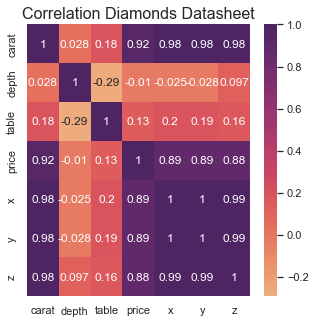

In [54]:
plt.figure(figsize=(5,5))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.color_palette("flare", 50), annot=True)
plt.title("Correlation Diamonds Datasheet", fontsize=16)
plt.show()

Dark red rectangles give a hint about correlations. Thus we see a value close to 1 for carat & price, as well as for carat and the x, y, z variables. This heatmap shows us which variables probably influence each other. For example does carat has an influence on the price. Also, carat is linear independent from the variables x, y and z. So we can see a dense connection between price, carat and the three variables of x, y and z.

Text(0.5, 1.0, 'Diamonds Cut vs Carat')

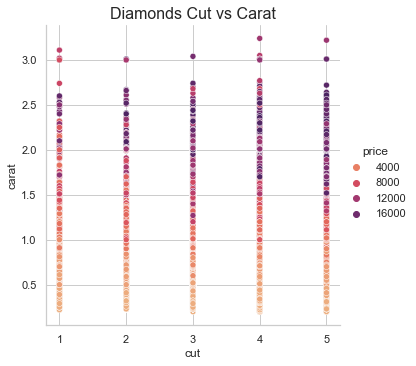

In [55]:
sns.relplot(
    data=diamonds, x="cut", y="carat",
    hue="price", palette="flare",
    kind="scatter"
)
plt.title("Diamonds Cut vs Carat", fontsize =16)

In this scatterplot we can see, that the price rises when the value for carat rises too. This happens even when looking at each value for cut individually. We also see a sort of similarity in the price ranges. Meaning according to a specific carat value the value for price rises. This is shown by the color coding, in the lower carat values the dots are yellow, moving to caratvalues about 1.5 the dots get orange. In high carat values like 2 - 2.5 the dots get purple.

## Feature Engineering

Source: https://medium.com/@polanitzer/a-regression-project-in-python-predict-diamonds-prices-based-on-cut-color-clarity-and-other-d856c0ba9a2c

For an easier understanding and less variables in the dataset we decided to join the variables x, y and z together in a volume variable.

In [56]:
diamonds["vol"] = diamonds.x * diamonds.y * diamonds.z

In [57]:
diamonds.drop(["x","y","z"], axis=1, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.83,4,5,4,60.2,60.0,3495,134.260140
1,1.25,4,3,3,60.7,58.0,5027,209.632896
2,0.41,4,7,3,60.5,60.0,791,66.536730
3,0.31,2,3,4,63.1,57.0,489,49.990828
4,0.30,5,4,8,62.2,55.0,844,49.783680


### Split Training Sets

Starting into splitting the dataset into two sets, one for training the algorithm, one for testing it.  
First we drop the column for price, because this is the variable we want to predict based on the other variables.
Thus we claim the variable for price the dependent variable, because it's value depends on the other variables, and the other variables the independent variables, because they only influence the price variable. With this classification we set up the deductive hypothesis of the price being influenced by the other variables of the dataset and we will test this hypothesis with specific methods.

In [58]:
X = diamonds.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.83,4,5,4,60.2,60.0,134.260140
1,1.25,4,3,3,60.7,58.0,209.632896
2,0.41,4,7,3,60.5,60.0,66.536730
3,0.31,2,3,4,63.1,57.0,49.990828
4,0.30,5,4,8,62.2,55.0,49.783680


In [59]:
y = diamonds["price"]
y.head()

0    3495
1    5027
2     791
3     489
4     844
Name: price, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Price Prediction

### Modeling

#### Linear Regression

In [14]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [278]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 90.61%
R squared of the Linear Regression on test set: 91.00%


The linear regression already gives us a very good correlation score of 90.61% and 91%.

Text(0.5, 1.0, 'Diamonds Linear Regression')

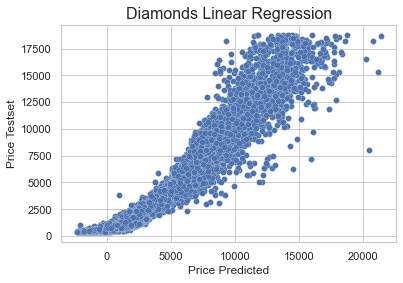

In [279]:
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_pred , y=y_test,
               linewidth=0.2)
plt.xlabel("Price Predicted")
plt.ylabel("Price Testset")
plt.title("Price Prediction Linear Regression", fontsize =16)

With the linear regression we get the coefficient of determination, R2 (R squared). This value tells us, how good the model fits for the prediction, we are testing. R2 can be between 0 and 1, with 1 as the optimal outcome, indicating, that the prediction is a perfect fit for the data.  
In our case the value for R2 is 90.61% for the training and 91% for the test set, which are pretty good values! In the scatterplot we see a pretty good linear course.

In [70]:
import sklearn.metrics as mt
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_test,y_pred)))

Our linear regression model was able to predict the price of every diamond in the test set with an error of ± $845.55 of the real price.

#### Random Forest Model

In [12]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [274]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.73%
R squared of the Random Forest Regressor on test set: 98.12%


With the random forest model we even get higher R2-squared values than with the linear regression.

Text(0.5, 1.0, 'Diamonds Random Forest Regression')

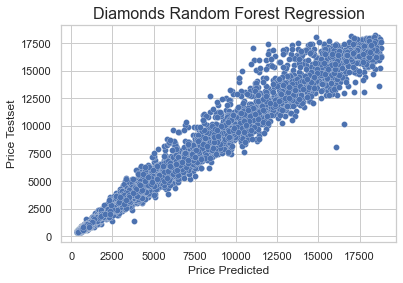

In [275]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2,
                palette="flare",
               linewidth=0.2)
plt.xlabel("Price Predicted")
plt.ylabel("Price Test")
plt.title("Price Prediction Random Forest Regression", fontsize =16)

Furthermore the random forest method was used for regression. This method is an ensemble method and can be used for classification and regression. Doing a regression with this method we also get the R2 value for the prediction.  
With this method we achieved even better values for R2 with 99.73% for the training and 98.12% for the test set.

In [276]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred2 = rfr.predict(X_test)

print("MAE: ",mean_absolute_error(y_test, y_pred2))
print("R2: ", r2_score(y_test, y_pred2))
print("MSE: ", mean_squared_error(y_test, y_pred2))

MAE:  279.26879352290655
R2:  0.9809213752284173
MSE:  302570.70049936784


The mean squared error shows us, how much the predicted price differs from the actual price. This value is given in USD, as is the price. So we can say, the mean absolute error of this prediction is 279 Dollar.  
The mean price of the data set is 3925.8 Dollar. 279 Dollar divided by 3925.8 Dollar is 0.07. So the mean absolute error is 7% which is a pretty good value.  
With the linear regression model the MAE was 845.5 Dollar, which is a much higher deviation. So at this point we decide that the Random Forest Regression model does fit the data better!

### Hyperparameter Tuning¶
#### Grid Search for Random Forest Model

Source: https://www.kaggle.com/code/mikecalgary/diamond-model-optimization-for-99-accuracy

After testing the modelling we will try to perfect their performance. Because the linear model did not show as good results as the ensemble method with random forest, we will only continue with the latter.

In [281]:
from sklearn.model_selection import GridSearchCV
from math import sqrt

# Forest and Gradient parameters respectively
forestparam = {'max_depth': [ 11, 13, 15, 17], 'n_estimators': [100, 200, 500]}
gradientparam = {'max_depth': [1, 3, 5, 7], 'n_estimators': [100, 200, 500],
                 'learning_rate': [0.01, 0.1, 1.0]}

In [282]:
# performing grid search for RandomForestRegressor
forestgrid = GridSearchCV(RandomForestRegressor(random_state=30), forestparam)
forestgrid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=30),
             param_grid={'max_depth': [11, 13, 15, 17],
                         'n_estimators': [100, 200, 500]})

In [283]:
forest_model = RandomForestRegressor(random_state=30, max_depth= 15, max_features=1.0, n_estimators= 100)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=30)

In [284]:
# best model for the random forest regression
print(forestgrid.best_params_)
print('Best score: ', forestgrid.best_score_)

{'max_depth': 13, 'n_estimators': 500}
Best score:  0.9807450997107223


In [287]:
rmse_train = sqrt(mean_squared_error(y_train, forest_model.predict(X_train)))
rmse_test = sqrt(mean_squared_error(y_test, forest_model.predict(X_test)))
r_squared_train = r2_score(y_train, forest_model.predict(X_train))
r_squared_test = r2_score(y_test, forest_model.predict(X_test))
print("RandomForestRegressor")
print("Root-Mean-Squared-Error")
print("Training-Set:", rmse_train)
print("Test-Set:", rmse_test)
print("R-Squared")
print("Training-Set", r_squared_train)
print("Test-Set", r_squared_test)

RandomForestRegressor
Root-Mean-Squared-Error
Training-Set: 276.7984548516731
Test-Set: 545.6763829951268
R-Squared
Training-Set 0.9951508859119955
Test-Set 0.9812245432215086


We used 30 for random state, 100 estimated parameters and 15 for max_depth. The R2-squared value is already very high and close to 1 with 99% for the training and 98% for the test set.

Retraining the model with the fitted parameters.

In [288]:
# retrain model with best parameters
forest_model = RandomForestRegressor(random_state=64, max_depth= 13, max_features=1.0, n_estimators= 500)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=500, random_state=64)

In [289]:
rmse_train = sqrt(mean_squared_error(y_train, forest_model.predict(X_train)))
rmse_test = sqrt(mean_squared_error(y_test, forest_model.predict(X_test)))
r_squared_train = r2_score(y_train, forest_model.predict(X_train))
r_squared_test = r2_score(y_test, forest_model.predict(X_test))
print("RandomForestRegressor")
print("Root-Mean-Squared-Error")
print("Training-Set:", rmse_train)
print("Test-Set:", rmse_test)
print("R-Squared")
print("Training-Set", r_squared_train)
print("Test-Set", r_squared_test)

RandomForestRegressor
Root-Mean-Squared-Error
Training-Set: 339.2416042399044
Test-Set: 543.1079344417924
R-Squared
Training-Set 0.9927162791040295
Test-Set 0.981400875948438


With fitted parameters for random-state, max_depth and n_estimators we are not able to achieve a better result. The values for RMSE have increased and R2-squared have slightly decreased.

Lastly, we plot the predicted versus the actual plot of the best, most-optimized model, which of the Random Forest Regression with its hyperparameters optimized.

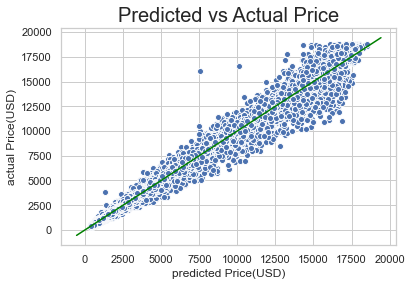

In [290]:
df = pd.DataFrame({'predicted Price(USD)':forest_model.predict(X), 'actual Price(USD)':y})
sns.scatterplot(data=df, x = 'predicted Price(USD)', y = 'actual Price(USD)', linewidth=0.9)
plt.title("Predicted vs Actual Price", fontsize =20)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 1 * x_vals
plt.plot(x_vals, y_vals, '-', color="green")
plt.show()

### Evaluation

#### Linear Regression

In [291]:
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
34819,10534,11405.366777,871.366777
6764,2942,3854.463967,912.463967
44853,939,1277.242379,338.242379
14290,6169,5758.340875,-410.659125
21613,816,1223.706825,407.706825
...,...,...,...
15652,675,-629.998072,-1304.998072
40737,731,1130.871080,399.871080
17007,1063,786.395288,-276.604712
37758,702,345.098701,-356.901299


Text(0.5, 1.0, 'Diamonds Prediction Price')

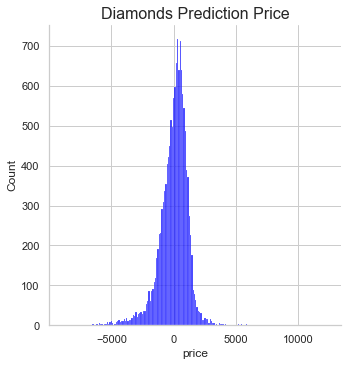

In [292]:
sns.displot(y_pred - y_test, color="blue")
plt.title("Diamonds Price Prediction", fontsize =16)

#### Random Forest Regressor Model

In [58]:
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf

,true,predicted,diff
34819,10534,13046.910000,2512.910000
6764,2942,2808.408333,-133.591667
44853,939,893.490000,-45.510000
14290,6169,5913.584000,-255.416000
21613,816,948.480000,132.480000
...,...,...,...
15652,675,641.055000,-33.945000
40737,731,610.650000,-120.350000
17007,1063,870.923333,-192.076667
37758,702,834.538667,132.538667


In [293]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 279.27


Our random forest regressor model was able to predict the price of every diamond in the test set with an error of ± $279.27 of the real price.

### Conclusion Price Prediction

The Linear Regression Model results in a much higher mean absolute error then the Random Forest Model and it's values for the R2-squared variable are for both the train adn the test set at about 90 percent, which is quite good. But, with the Random Forest Model the MAE differs only ± $278 from the real price and it's R2-squared values are close to 100 percent. Thus, we see that the Random Forest model is a better fit for the diamond data set when it comes to the price prediction. Finetuning of the hyperparameters does not have a big effect though.

## Cut Prediction
### Modeling

#### Linear Regression

In [61]:
X_cut = diamonds.drop(["cut"], axis=1)
X_cut.head()

,carat,color,clarity,depth,table,price,vol
0,0.83,5,4,60.2,60.0,3495,134.260140
1,1.25,3,3,60.7,58.0,5027,209.632896
2,0.41,7,3,60.5,60.0,791,66.536730
3,0.31,3,4,63.1,57.0,489,49.990828
4,0.30,4,8,62.2,55.0,844,49.783680


In [62]:
y_cut = diamonds["cut"]
y_cut.head()

0    4
1    4
2    4
3    2
4    5
Name: cut, dtype: object

In [63]:
X_cut_train, X_cut_test, y_cut_train, y_cut_test = train_test_split(X_cut, y_cut, test_size=0.30, random_state=42)

In [64]:
linreg = sl.LinearRegression()
linreg.fit(X_cut_train, y_cut_train)

LinearRegression()

In [65]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_cut_train, y_cut_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_cut_test, y_cut_test)))

R squared of the Linear Regression on training set: 33.01%
R squared of the Linear Regression on test set: 33.96%


Text(0.5, 1.0, 'Cut Prediction Linear Regression')

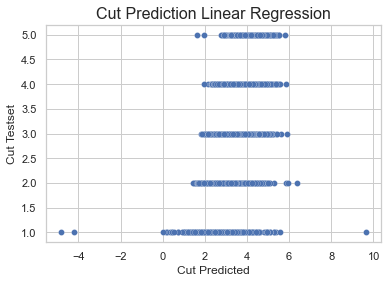

In [66]:
y_cut_pred = linreg.predict(X_cut_test)
sns.scatterplot(x=y_cut_pred , y=y_cut_test,
               linewidth=0.2)
plt.xlabel("Cut Predicted")
plt.ylabel("Cut Testset")
plt.title("Cut Prediction Linear Regression", fontsize =16)

In [68]:
print("MAE: ",mean_absolute_error(y_cut_test, y_cut_pred))
print("R2: ", r2_score(y_cut_test, y_cut_pred))
print("MSE: ", mean_squared_error(y_cut_test, y_cut_pred))

MAE:  0.7341075400186801
R2:  0.3396091238908635
MSE:  0.8233883564329258


In [71]:
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_cut_test,y_cut_pred)))

Mean Absolute Error of the Linear Regression on test set is 0.73


For the cut prediction the Linear Regression model only achieves a R2-squared value of about 33%, but the MAE is low with only 0.72 difference from the real value for the cut. This value is so small, because the values for the cut variable are only whole numbers up to 5. So 0.72 divided by 5 is still 14% difference (more then for the price prediction). So we test is the Random Forest model offers a better fit.

#### Random Forest Model

In [72]:
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_cut_train, y_cut_train)

RandomForestRegressor(random_state=42)

In [73]:
r_squared_train = rf.score(X_cut_train, y_cut_train)
r_squared_test = rf.score(X_cut_test, y_cut_test)

print("R-Squared of Random Forest")
print("Training-Set", r_squared_train,"%")
print("Test-Set", r_squared_test, "%")

R-Squared of Random Forest
Training-Set 0.9546339608617455 %
Test-Set 0.6803313396726514 %


Again for the cut prediction we got a better value for R2-squared using the Random Forest Method. R2-squared is here 95.9% for the training and 68% for the test set.

In [76]:
rfr = RandomForestRegressor()
rfr.fit(X_cut_train, y_cut_train)
y_cut_pred2 = rfr.predict(X_cut_test)

print("MAE: ",mean_absolute_error(y_cut_test, y_cut_pred))

MAE:  0.7341075400186801


Text(0.5, 1.0, 'Cut Prediction Random Forest Regression')

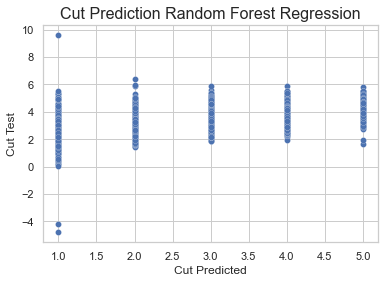

In [77]:
y_pred2 = rf.predict(X_cut_test)
sns.scatterplot(x=y_cut_test , y=y_cut_pred,
                palette="flare",
               linewidth=0.2)
plt.xlabel("Cut Predicted")
plt.ylabel("Cut Test")
plt.title("Cut Prediction Random Forest Regression", fontsize =16)

Also the MAE is quite the same than for the Linear Regression. Here we also have 14% (0.73/5) difference between predicted and actual value.

### Hyperparameter Tuning
#### Grid Search Random Forest Model


In [305]:
# Forest and Gradient parameters respectively
forestparam = {'max_depth': [ 11, 13, 15, 17], 'n_estimators': [100, 200, 500]}
gradientparam = {'max_depth': [1, 3, 5, 7], 'n_estimators': [100, 200, 500],
                 'learning_rate': [0.01, 0.1, 1.0]}

In [306]:
# performing grid search for RandomForestRegressor
forestgrid = GridSearchCV(RandomForestRegressor(random_state=64), forestparam)
forestgrid.fit(X_cut_train, y_cut_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=64),
             param_grid={'max_depth': [11, 13, 15, 17],
                         'n_estimators': [100, 200, 500]})

In [307]:
forest_model = RandomForestRegressor(random_state=64, max_depth= 15, max_features=1.0, n_estimators= 500)
forest_model.fit(X_cut_train, y_cut_train)

RandomForestRegressor(max_depth=15, n_estimators=500, random_state=64)

In [308]:
# best model for the random forest regression
print(forestgrid.best_params_)
print('Best score: ', forestgrid.best_score_)

{'max_depth': 17, 'n_estimators': 500}
Best score:  0.7095413299549679


In [324]:
RMSE_train = sqrt(mean_squared_error(y_cut_train, forest_model.predict(X_cut_train)))
RMSE_test = sqrt(mean_squared_error(y_cut_test, forest_model.predict(X_cut_test)))
r_squared_train = r2_score(y_cut_train, forest_model.predict(X_cut_train))
r_sqaured_test = r2_score(y_cut_test, forest_model.predict(X_cut_test))

print("Root Mean Squared Error Random Forest:")
print("Training-Set:", RMSE_train)
print("Test-Set:", RMSE_test)

print("R2-Squared RandomForestRegressor:")
print("Training-Set", r_squared_train)
print("Test-Set", r_squared_test)

Root Mean Squared Error Random Forest:
Training-Set: 0.5313540468437322
Test-Set: 0.6048078325854457
R2-Squared RandomForestRegressor:
Training-Set 0.774547186965565
Test-Set 0.7141672810997752


R2-squared training set is 77%, for the test set it is 71%. Those results are ok, but we try, if we can get better result by training with fitted the hyperparameters.

In [325]:
# retrain model with best parameters
forest_model = RandomForestRegressor(random_state=64, max_depth= 17, max_features=1.0, n_estimators= 500)
forest_model.fit(X_cut_train, y_cut_train)

RandomForestRegressor(max_depth=17, n_estimators=500, random_state=64)

In [326]:
RMSE_train = sqrt(mean_squared_error(y_cut_train, forest_model.predict(X_cut_train)))
RMSE_test = sqrt(mean_squared_error(y_cut_test, forest_model.predict(X_cut_test)))
r_squared_train = r2_score(y_cut_train, forest_model.predict(X_cut_train))
r_sqaured_test = r2_score(y_cut_test, forest_model.predict(X_cut_test))

print("Root Mean Squared Error Random Forest:")
print("Training-Set:", RMSE_train)
print("Test-Set:", RMSE_test)

print("R2-Squared RandomForestRegressor:")
print("Training-Set", r_squared_train)
print("Test-Set", r_squared_test)

Root Mean Squared Error Random Forest:
Training-Set: 0.43328057370800926
Test-Set: 0.5956306290535014
R2-Squared RandomForestRegressor:
Training-Set 0.8500915516995984
Test-Set 0.7141672810997752


Due to fitting the hyperparameters we were able to increase the R2-squared value for the training set up to 85%.

Lastly, we plot the predicted versus the actual plot of the best, most-optimized model, which of the Random Forest Regression with its hyperparameters optimized.

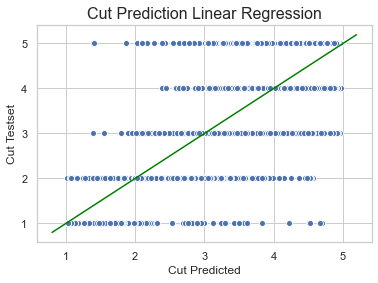

In [337]:
y_cut_pred2 = forest_model.predict(X_cut_test)
sns.scatterplot(x=y_cut_pred2, y=y_cut_test,
                linewidth=0.9)
plt.xlabel("Cut Predicted")
plt.ylabel("Cut Testset")
plt.title("Cut Prediction Random Forest Model", fontsize =16)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 1 * x_vals
plt.plot(x_vals, y_vals, '-', color="green")
plt.show()

Well, we see a clearly not-linear relation.

### Evaluation

#### Random Forest Regressor Model

In [338]:
d = {"true": y_cut_test, "predicted": y_cut_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf

,true,predicted,diff
34819,5,4.469826,-0.530174
6764,4,3.895789,-0.104211
44853,3,4.766070,1.76607
14290,4,3.952853,-0.047147
21613,5,4.941216,-0.058784
...,...,...,...
15652,4,3.568825,-0.431175
40737,3,4.140703,1.140703
17007,4,3.943366,-0.056634
37758,5,4.863612,-0.136388


In [339]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_cut_test,y_cut_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 0.41


### Conclusion Cut Prediction

The R2-squared value from the Linear Regression Model is with round about 33% not very convincing. The Random Forest Model could achieve a R2-squared value of 95% for the training and 68.03% for the test set. According to those values we see what happens often for the Random Forest Model: it overfits the training data (very high R2-squared) and underfits the test data (quite low R2-squared).  
The MAE of both predictions is a little different. The Linear Regression has the MAE of 0.72 and the Random Forest's MAE is 0.41. With the method of grid search we were not able to achieve much improvements for the hyperparameter tuning, the values for R2-squared for thee training set only increased a little, up to 85%. But we could close the gap between the R2-squared values for the training and the test set with fitting the hyperparameters (R2-squared test set: 71%)

## Clustering Cut Prediction

By clustering we seek to find similarities within the dataset. It is the goal to find groups amongst the data and to analyse this behavior.

In [340]:
from sklearn.cluster import KMeans

In [357]:
X_cut.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.83,5,4,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,3,3,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,7,3,60.5,60.0,791,4.77,4.81,2.90
3,0.31,3,4,63.1,57.0,489,4.28,4.31,2.71
4,0.30,4,8,62.2,55.0,844,4.30,4.32,2.68


In [376]:
# Creating algorithm and setting it's parameters
K_Means_2 = KMeans(n_clusters=3)

# Training - "Fitting to the data"
K_Means_2.fit(X_cut)

# Make predictions
clusters_2 = K_Means_2.predict(X_cut)

In [377]:
# Creating algorithm and setting it's parameters
K_Means_4 = KMeans(n_clusters=3)

# Training - "Fitting to the data"
K_Means_4.fit(diamonds)

# Make predictions
clusters_4 = K_Means_4.predict(diamonds)

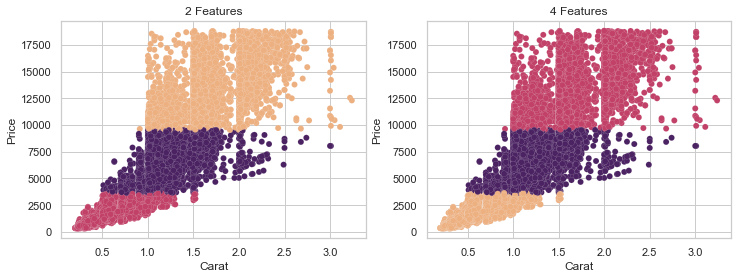

In [385]:
plt.figure(figsize=(12,4))

# subplot no. 1
plt.subplot(1,2,1)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('2 Features')
# Show scatter plot - The color (c) is determined by the clusters.
plt.scatter(diamonds["carat"], diamonds["price"], c=clusters_2, edgecolors='white', linewidths=.1, cmap="flare")

#subplot nr. 2
plt.subplot(1,2,2)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('4 Features')
# Show scatter plot - The color (c) is determined by the clusters.
plt.scatter(diamonds["carat"], diamonds["price"], c=clusters_4, edgecolors='white', linewidths=.1, cmap="flare")
plt.show()

We find 3 groups amongst the diamonds dataset and we can see, that those groups are based upon the price. One group for a high price of a diamond, one group for low prices and one in between those two.